In [2]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)   

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)   

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(np.shape(inputs))
print(np.shape(negative_samples))
print(np.shape(positive_samples))
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

(2000, 2)
(1000, 2)
(1000, 2)


In [4]:
model = keras.Sequential([
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='rmsprop',                  

              loss='mean_squared_error',            

              metrics=['accuracy'])


In [6]:
history = model.fit(
  inputs,          

  targets,         

  epochs=5,        

  batch_size=128   

)


Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 0.4101 - accuracy: 0.0615 
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.1035
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.0480
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.0315
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.0940


In [7]:
history.history

{'loss': [0.410114586353302,
  0.41000545024871826,
  0.4100040793418884,
  0.4100034534931183,
  0.41000354290008545],
 'accuracy': [0.061500001698732376,
  0.10350000113248825,
  0.04800000041723251,
  0.03150000050663948,
  0.09399999678134918]}

In [8]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))        

shuffled_inputs = inputs[indices_permutation]                   

shuffled_targets = targets[indices_permutation]                 


num_validation_samples = int(0.3 * len(inputs))                 

val_inputs = shuffled_inputs[-num_validation_samples:]          

val_targets = shuffled_targets[-num_validation_samples:]        

training_inputs = shuffled_inputs[:num_validation_samples]      

training_targets = shuffled_targets[:num_validation_samples]    

model.fit(
  training_inputs,                                              

  training_targets,                                             

  epochs=5,
  batch_size=16,
  validation_data=(val_inputs, val_targets)                     

)

Epoch 1/5
38/38 [==============================] - 1s 7ms/step - loss: 0.1084 - binary_accuracy: 0.9467 - val_loss: 0.0617 - val_binary_accuracy: 0.9733
Epoch 2/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0726 - binary_accuracy: 0.9450 - val_loss: 0.0942 - val_binary_accuracy: 0.9417
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 0.0709 - binary_accuracy: 0.9583 - val_loss: 0.2002 - val_binary_accuracy: 0.9083
Epoch 4/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0662 - binary_accuracy: 0.9517 - val_loss: 0.0946 - val_binary_accuracy: 0.9817
Epoch 5/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0750 - binary_accuracy: 0.9517 - val_loss: 0.0365 - val_binary_accuracy: 0.9967


In [9]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)



5/5 [==============================] - 0s 2ms/step - loss: 0.0365 - binary_accuracy: 0.9967


In [10]:
predictions = model.predict(val_inputs, batch_size=128)


In [11]:
print(predictions[:10])


[[0.21200234]
 [0.16674578]
 [0.2391595 ]
 [1.0008708 ]
 [0.8393517 ]
 [0.96693134]
 [0.8169826 ]
 [0.29466236]
 [0.9601721 ]
 [1.0027857 ]]


In [12]:
from tensorflow import keras 
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
from tensorflow.keras.datasets import mnist
  
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255 
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.1593 - accuracy: 0.94920s -
Epoch 2/5
846/938 [==========================>...] - ETA: 1s - loss: 0.0456 - accuracy: 0.9866

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


In [ ]:
print(f"Test accuracy: {test_acc:.3f}")

In [16]:
class DataframeSequence(keras.utils.Sequence):
    def __init__(self, df, batch_size):
        self.df = df
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.df['spectogram'][idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.df['labels'][idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

sequence = DataframeSequence(df, batch_size)
model.fit(sequence, epochs=10)

NameError: name 'df' is not defined

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

In [6]:
len(train_images)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32') / 255
test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32') / 255

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2574 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1042 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0686 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0368 - accuracy: 0.9885


In [14]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)

In [15]:
predictions[0]

array([1.3098779e-08, 6.8354725e-11, 4.9265836e-06, 6.1562954e-05,
       1.7498405e-12, 1.0654453e-08, 1.2632278e-14, 9.9992800e-01,
       1.4007506e-07, 5.4345978e-06], dtype=float32)

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.999928

In [19]:
test_labels[0]

7

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0609 - accuracy: 0.9815


In [22]:
print(f"test_acc: {test_acc}")

test_acc: 0.9815000295639038


In [30]:
import numpy as np

x = np.array(12)
x

array(12)

In [32]:
x.ndim
x.shape

()

In [25]:
x = np.array([12, 3, 6, 14, 7])

In [26]:
x

array([12,  3,  6, 14,  7])

In [27]:
x.ndim

1

In [28]:
x.shape

(5,)

In [33]:
x= np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])

In [34]:
x.ndim

2

In [35]:
x.shape

(3, 5)

In [36]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[8, 81, 5, 37, 3],
               [9, 82, 6, 38, 4],
               [10,83, 7, 39, 5]]])

In [37]:
x.ndim

3

In [38]:
x.shape

(2, 3, 5)

In [39]:
train_images.dtype

dtype('float32')

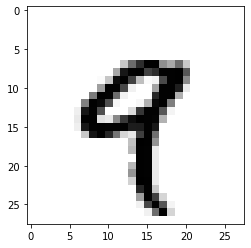

In [42]:
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()